In [24]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from math import log, exp

def Return_Approximate_Prob(N, k, n, m):
    return exp(-k*n/N)*(1+(k*n/N)*exp(k*m/N))

rcParams = {'font.size': 30 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

data_path = '/Users/harihara/Research-Activities/Data/SCRAPT/Simulations/'
d_Uniform = pickle.load(open(data_path+'Uniform_Distribution.pkl', 'rb'))
d_Normal = pickle.load(open(data_path+'Normal_Distribution.pkl', 'rb'))
d_Geometric = pickle.load(open(data_path+'Geometric_Distribution.pkl', 'rb'))

f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))

out_path = '/Users/harihara/Research-Activities/Plots/Iterative_Clustering/ISMB_Figures/'

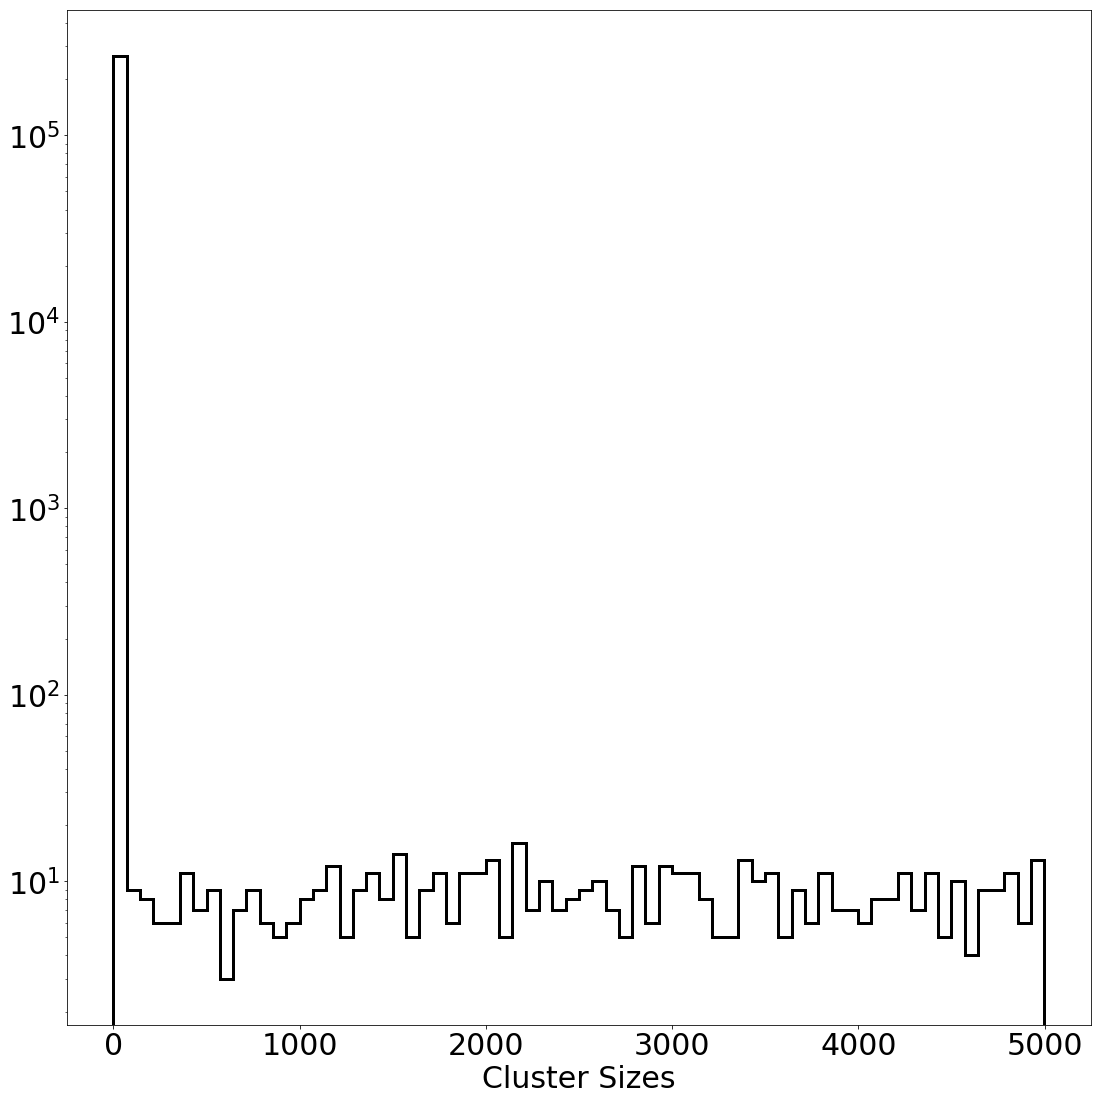

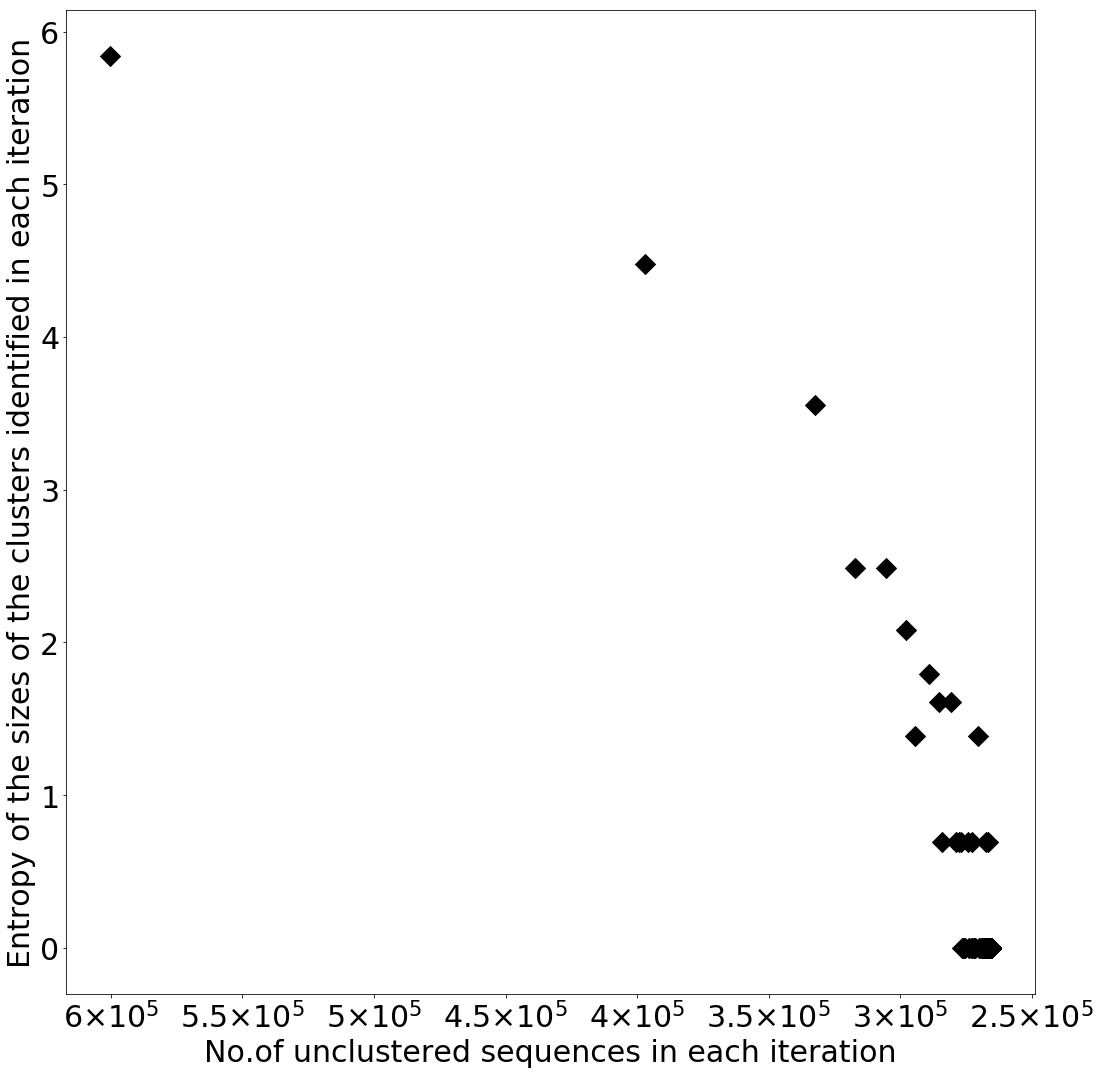

In [13]:
plt.rcParams.update(rcParams)

fig1,ax1 = plt.subplots(1,1,figsize = (16,16))
bins = ax1.hist(d_Uniform['Clusters'], bins = 70, density = False, histtype = 'step', linewidth = 3, 
                color = 'black')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster Sizes')
fig1.tight_layout()
fig1.savefig(out_path+'Simulation_Uniform_Cluster_Distribution.pdf')

fig2,ax2 = plt.subplots(1,1,figsize = (16,16))
d_Uniform['Naive_Sampling_Simulation'].plot.scatter('Num_Seqs_Unclustered','Entropy_Clustered', ax = ax2, 
                                                    s = 200, marker = 'D', color = 'black')
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(g))
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel('No.of unclustered sequences in each iteration')
ax2.set_ylabel('Entropy of the sizes of the clusters identified in each iteration')
fig2.tight_layout()
fig2.savefig(out_path+'Simulation_Uniform_Cluster_Entropy.pdf')


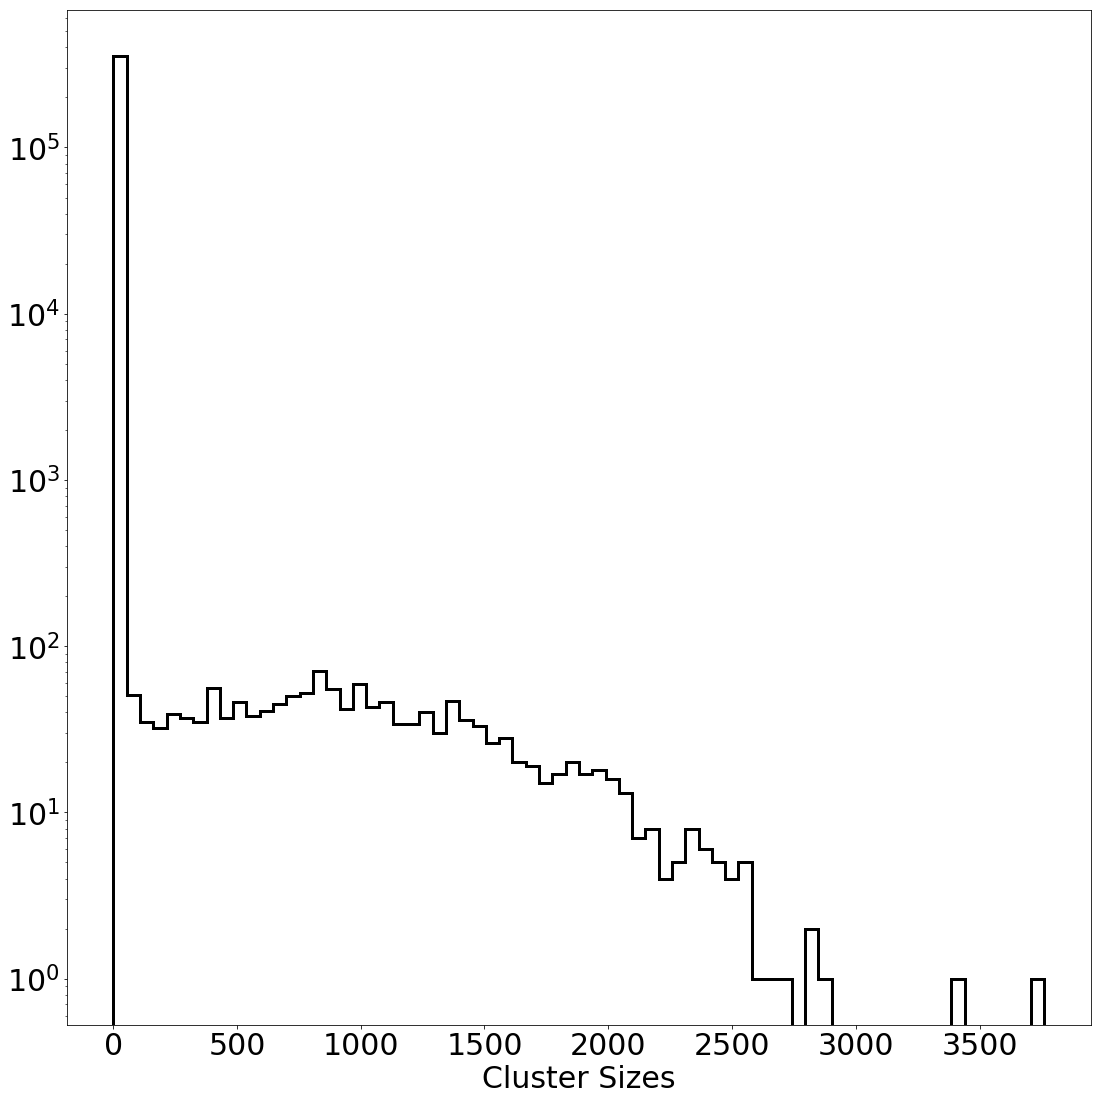

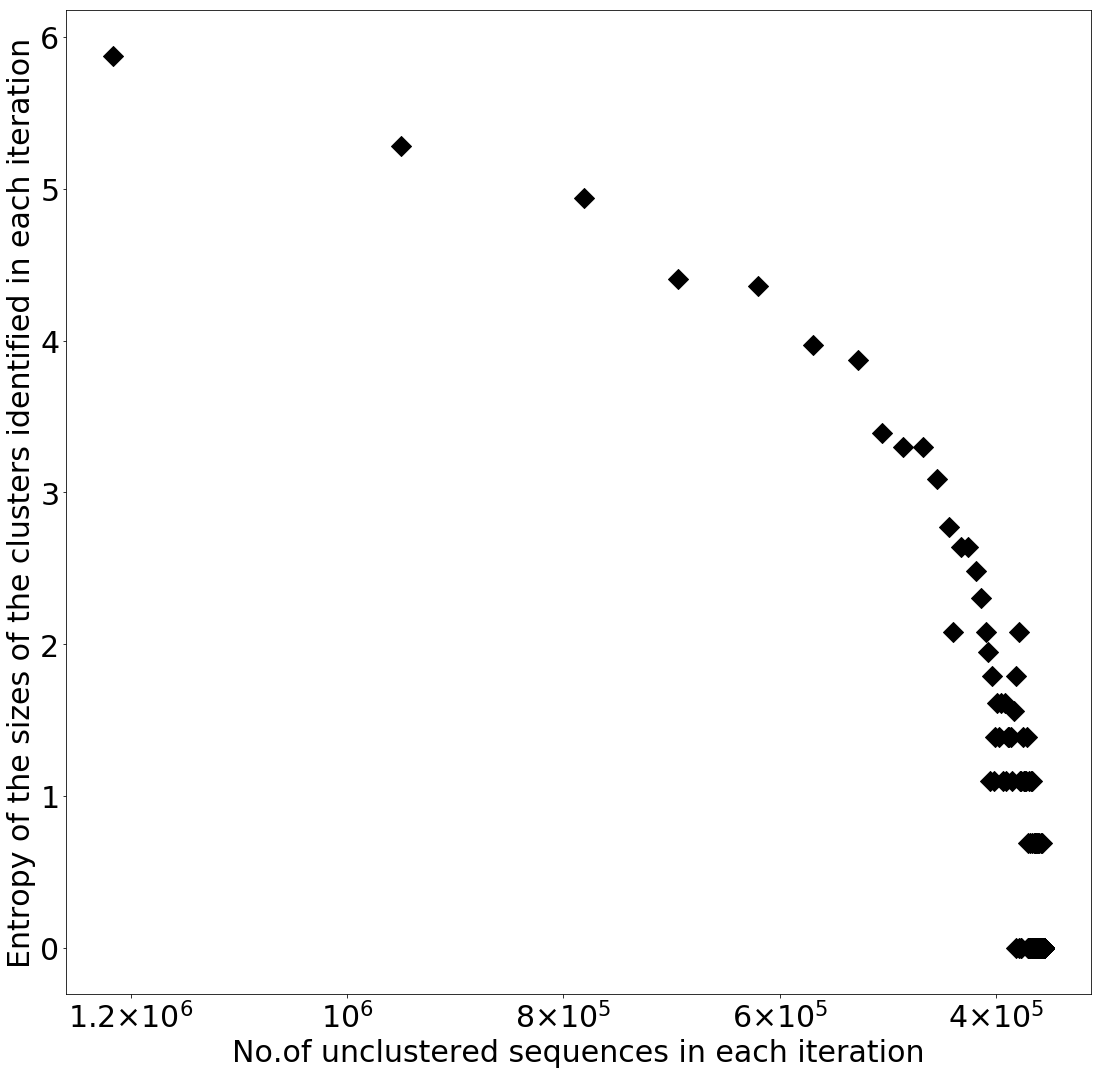

In [14]:
fig1,ax1 = plt.subplots(1,1,figsize = (16,16))
ax1.set_yscale('log')
ax1.set_xlabel('Cluster Sizes')
bins = ax1.hist(d_Normal['Clusters'], bins = 70, density = False, histtype = 'step', linewidth = 3, 
                color = 'black')
fig1.tight_layout()
fig1.savefig(out_path+'Simulation_Normal_Cluster_Distribution.pdf')

fig2,ax2 = plt.subplots(1,1,figsize = (16,16))
d_Normal['Naive_Sampling_Simulation'].plot.scatter('Num_Seqs_Unclustered','Entropy_Clustered', ax = ax2, 
                                                   s = 200, marker = 'D', color = 'black')
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(g))
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel('No.of unclustered sequences in each iteration')
ax2.set_ylabel('Entropy of the sizes of the clusters identified in each iteration')
fig2.tight_layout()
fig2.savefig(out_path+'Simulation_Normal_Cluster_Entropy.pdf')


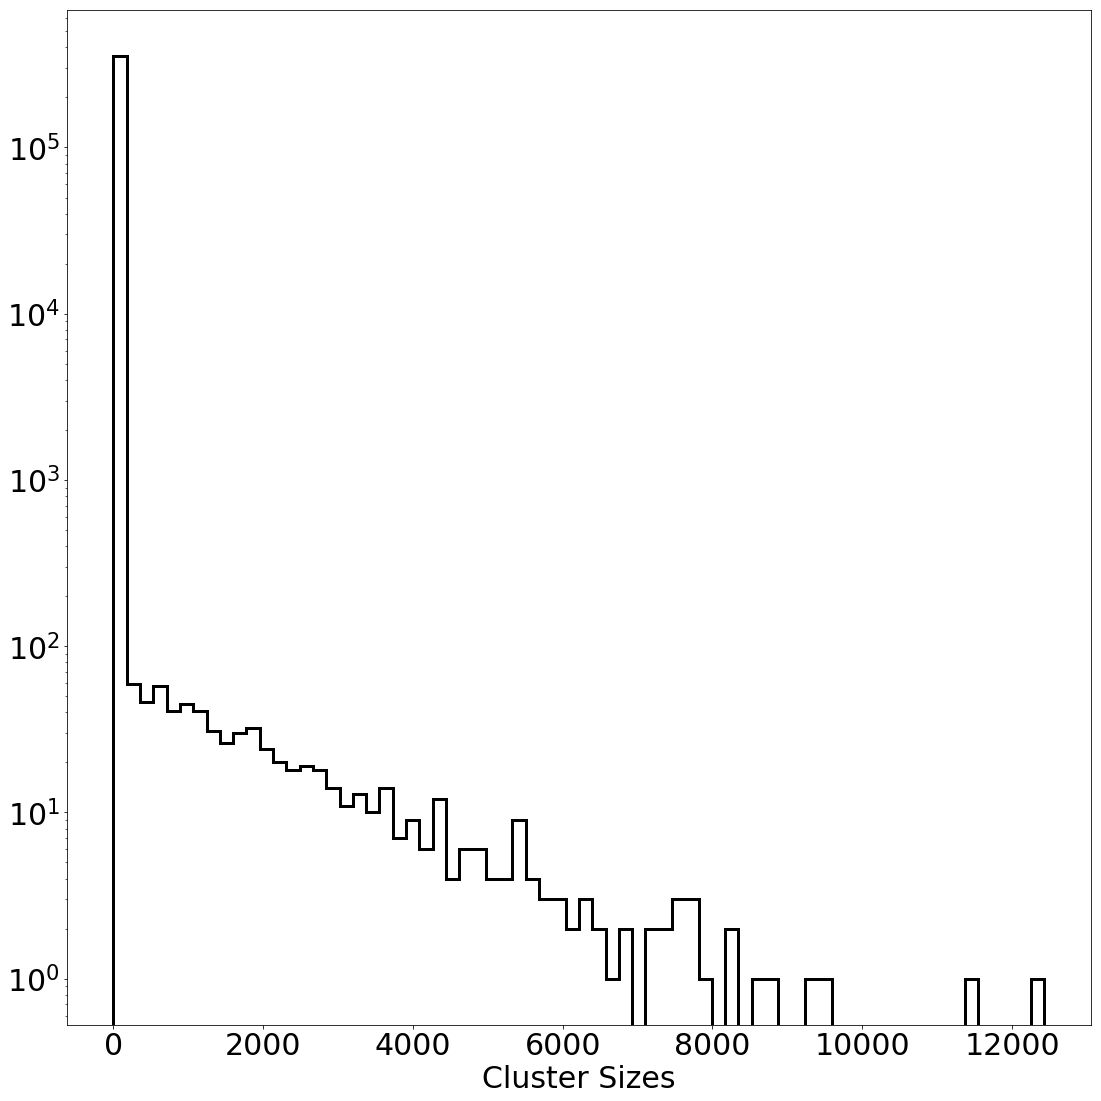

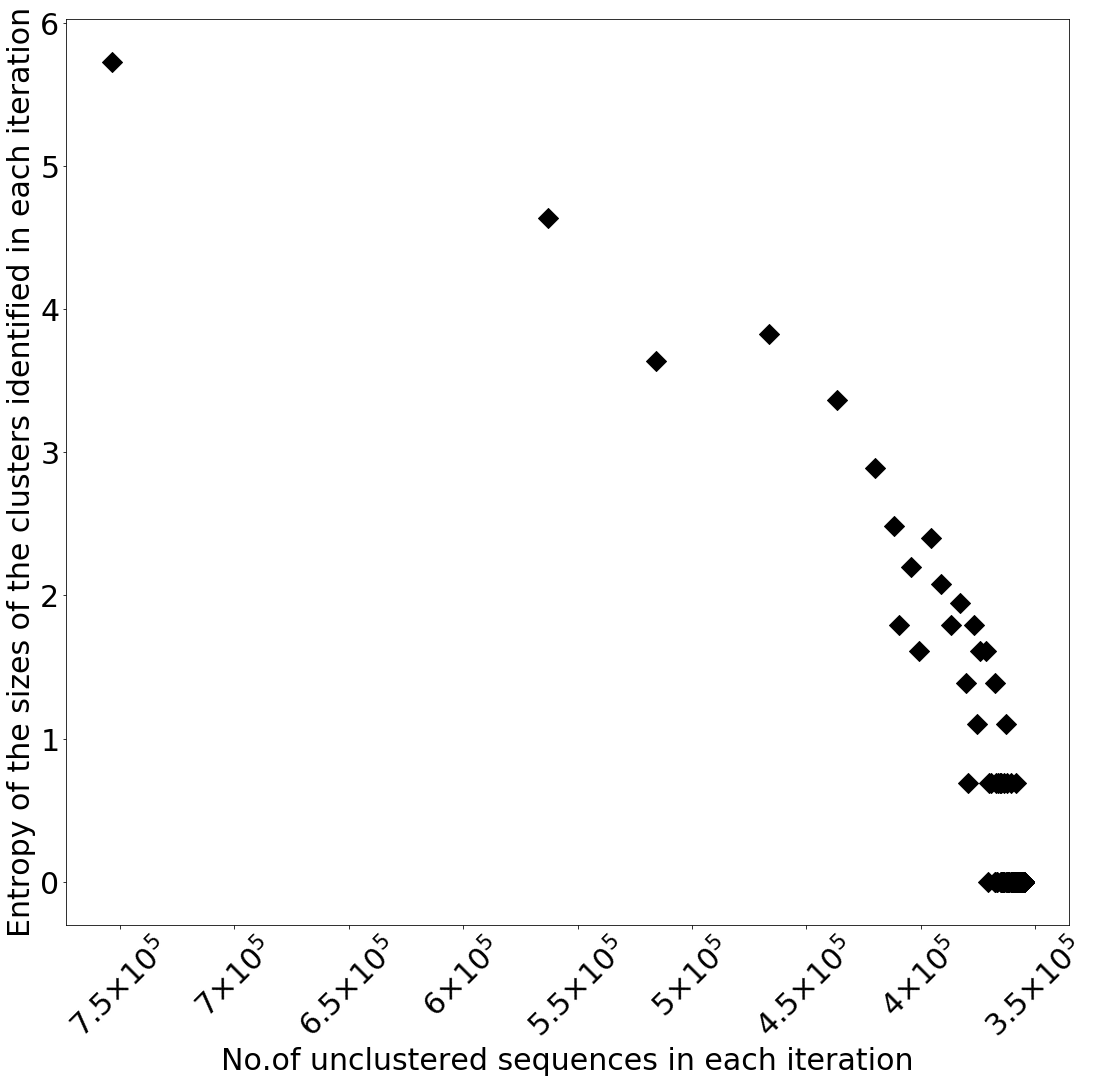

In [33]:
fig1,ax1 = plt.subplots(1,1,figsize = (16,16))
ax1.set_yscale('log')
ax1.set_xlabel('Cluster Sizes')
bins = ax1.hist(d_Geometric['Clusters'], bins = 70, density = False, histtype = 'step', linewidth = 3,
               color = 'black')
fig1.tight_layout()
fig1.savefig(out_path+'Simulation_Geometric_Cluster_Distribution.pdf')

fig2,ax2 = plt.subplots(1,1,figsize = (16,16))
d_Geometric['Naive_Sampling_Simulation'].plot.scatter('Num_Seqs_Unclustered','Entropy_Clustered', ax = ax2, 
                                                      s = 200, marker = 'D', color = 'black')

ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(g))
ax2.set_xlabel('No.of unclustered sequences in each iteration')
ax2.set_ylabel('Entropy of the sizes of the clusters identified in each iteration')
fig2.tight_layout()
fig2.savefig(out_path+'Simulation_Geometric_Cluster_Entropy.pdf')


In [17]:
N = 980180
alpha = [0.1,0.5,1.0,5.0,10.0]
df = pd.DataFrame()
for i in range(len(alpha)):
    actual, approximate = [], []
    s = int(alpha[i]*N/100.0)
    m = []
    for k in list(range(50,1000,1))+list(range(1000, 50000, 500)):
        approximate.append(Return_Approximate_Prob(N, k, s, 1))
    df[str(s)+'_Approximate'] = approximate
df['Cluster_Size'] = np.array(list(range(50,1000,1))+list(range(1000, 50000, 500)))/N*100.0


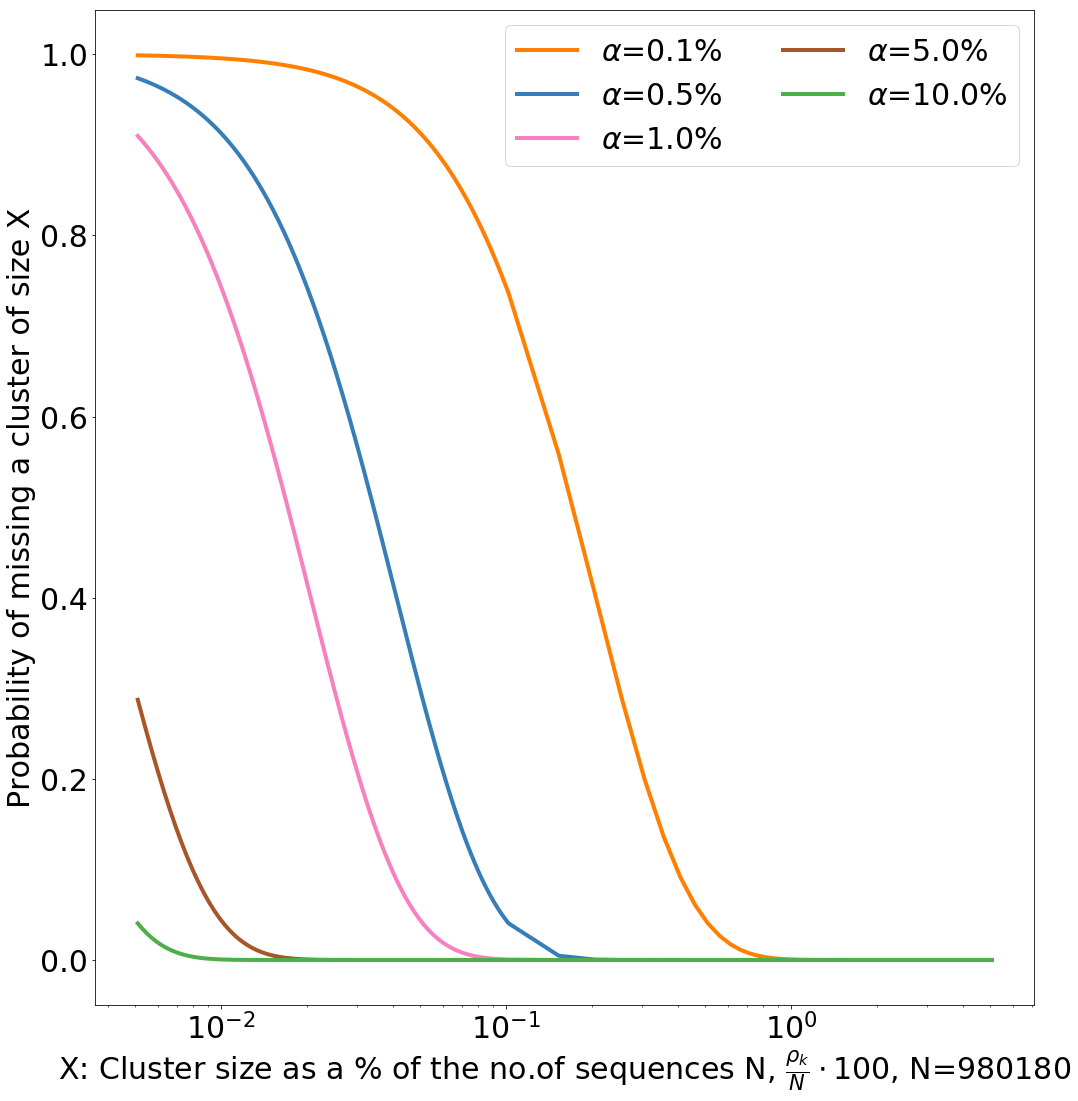

In [18]:
fig, ax = plt.subplots(1,1,figsize = (16,16))
colors = ['#ff7f00','#377eb8','#f781bf', '#a65628', '#4daf4a']
for i in range(len(alpha)):
    s = int(alpha[i]*N/100.0)
    df.plot('Cluster_Size', str(s)+'_Approximate', linewidth=4, color = colors[i], 
            ax = ax,label = r'$\alpha$='+str(alpha[i])+'%')
ax.legend(ncol = 2)
ax.set_xlabel(r'X: Cluster size as a % of the no.of sequences N, $\frac{\rho_k}{N}\cdot 100$, N=980180')
ax.set_ylabel('Probability of missing a cluster of size X')
ax.set_xscale('log')
fig.tight_layout()

fig.savefig(out_path+'Lemma-1.pdf')

In [19]:
alpha = 0.1
m = np.arange(10, 50000,10)

df = pd.DataFrame()

s = int(alpha*N/100.0)
for k in [10, 50, 100, 500, 1000, 5000, 40000]:
    approximate = []
    for j in m:
        b = Return_Approximate_Prob(N, k, s, 1)
        approximate.append(b**j)
    df[r'$\frac{\rho_1}{N}\cdot 100$='+str(round(k/N*100, 3))] = approximate
df['Num_Clusters'] = m
df = df.set_index('Num_Clusters')

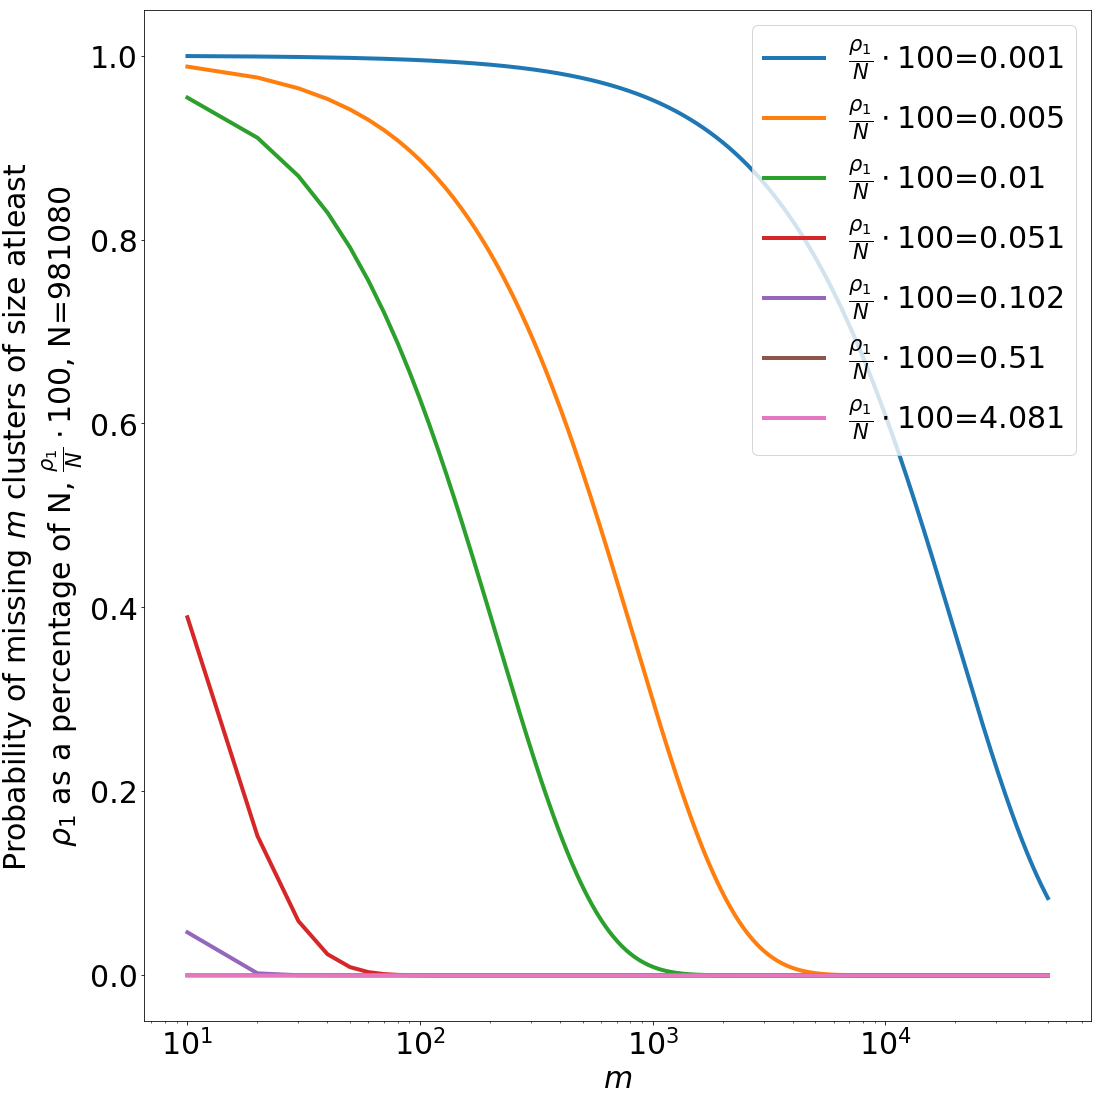

In [20]:
fig, ax = plt.subplots(1,1,figsize=(16,16))
df.plot(ax = ax, linewidth=4)
ax.set_xlabel(r'$m$')
ax.legend(ncol = 1, loc= 1)
ax.set_ylabel('Probability of missing $m$ clusters of size atleast\n'+r'$\rho_1$ as a percentage of N,'+
              r' $\frac{\rho_1}{N}\cdot 100$, N=981080')
ax.set_xscale('log')
fig.tight_layout()
fig.savefig(out_path+'Lemma-2.pdf')